In [1]:
!nvidia-smi

Tue Jun 25 03:24:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [42]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ufSklXR1QLMZRFvcBad7")
project = rf.workspace("reza-ghanbari").project("ships-in-google-earth")
version = project.version(31)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/root/datasets/ships-in-google-earth-31/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vis

In [11]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1719286030.388bcd006437.2415.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2355.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2356.jpg  weights
P_curve.png					    train_batch2357.jpg
PR_curve.png					    train_batch2.jpg


/content


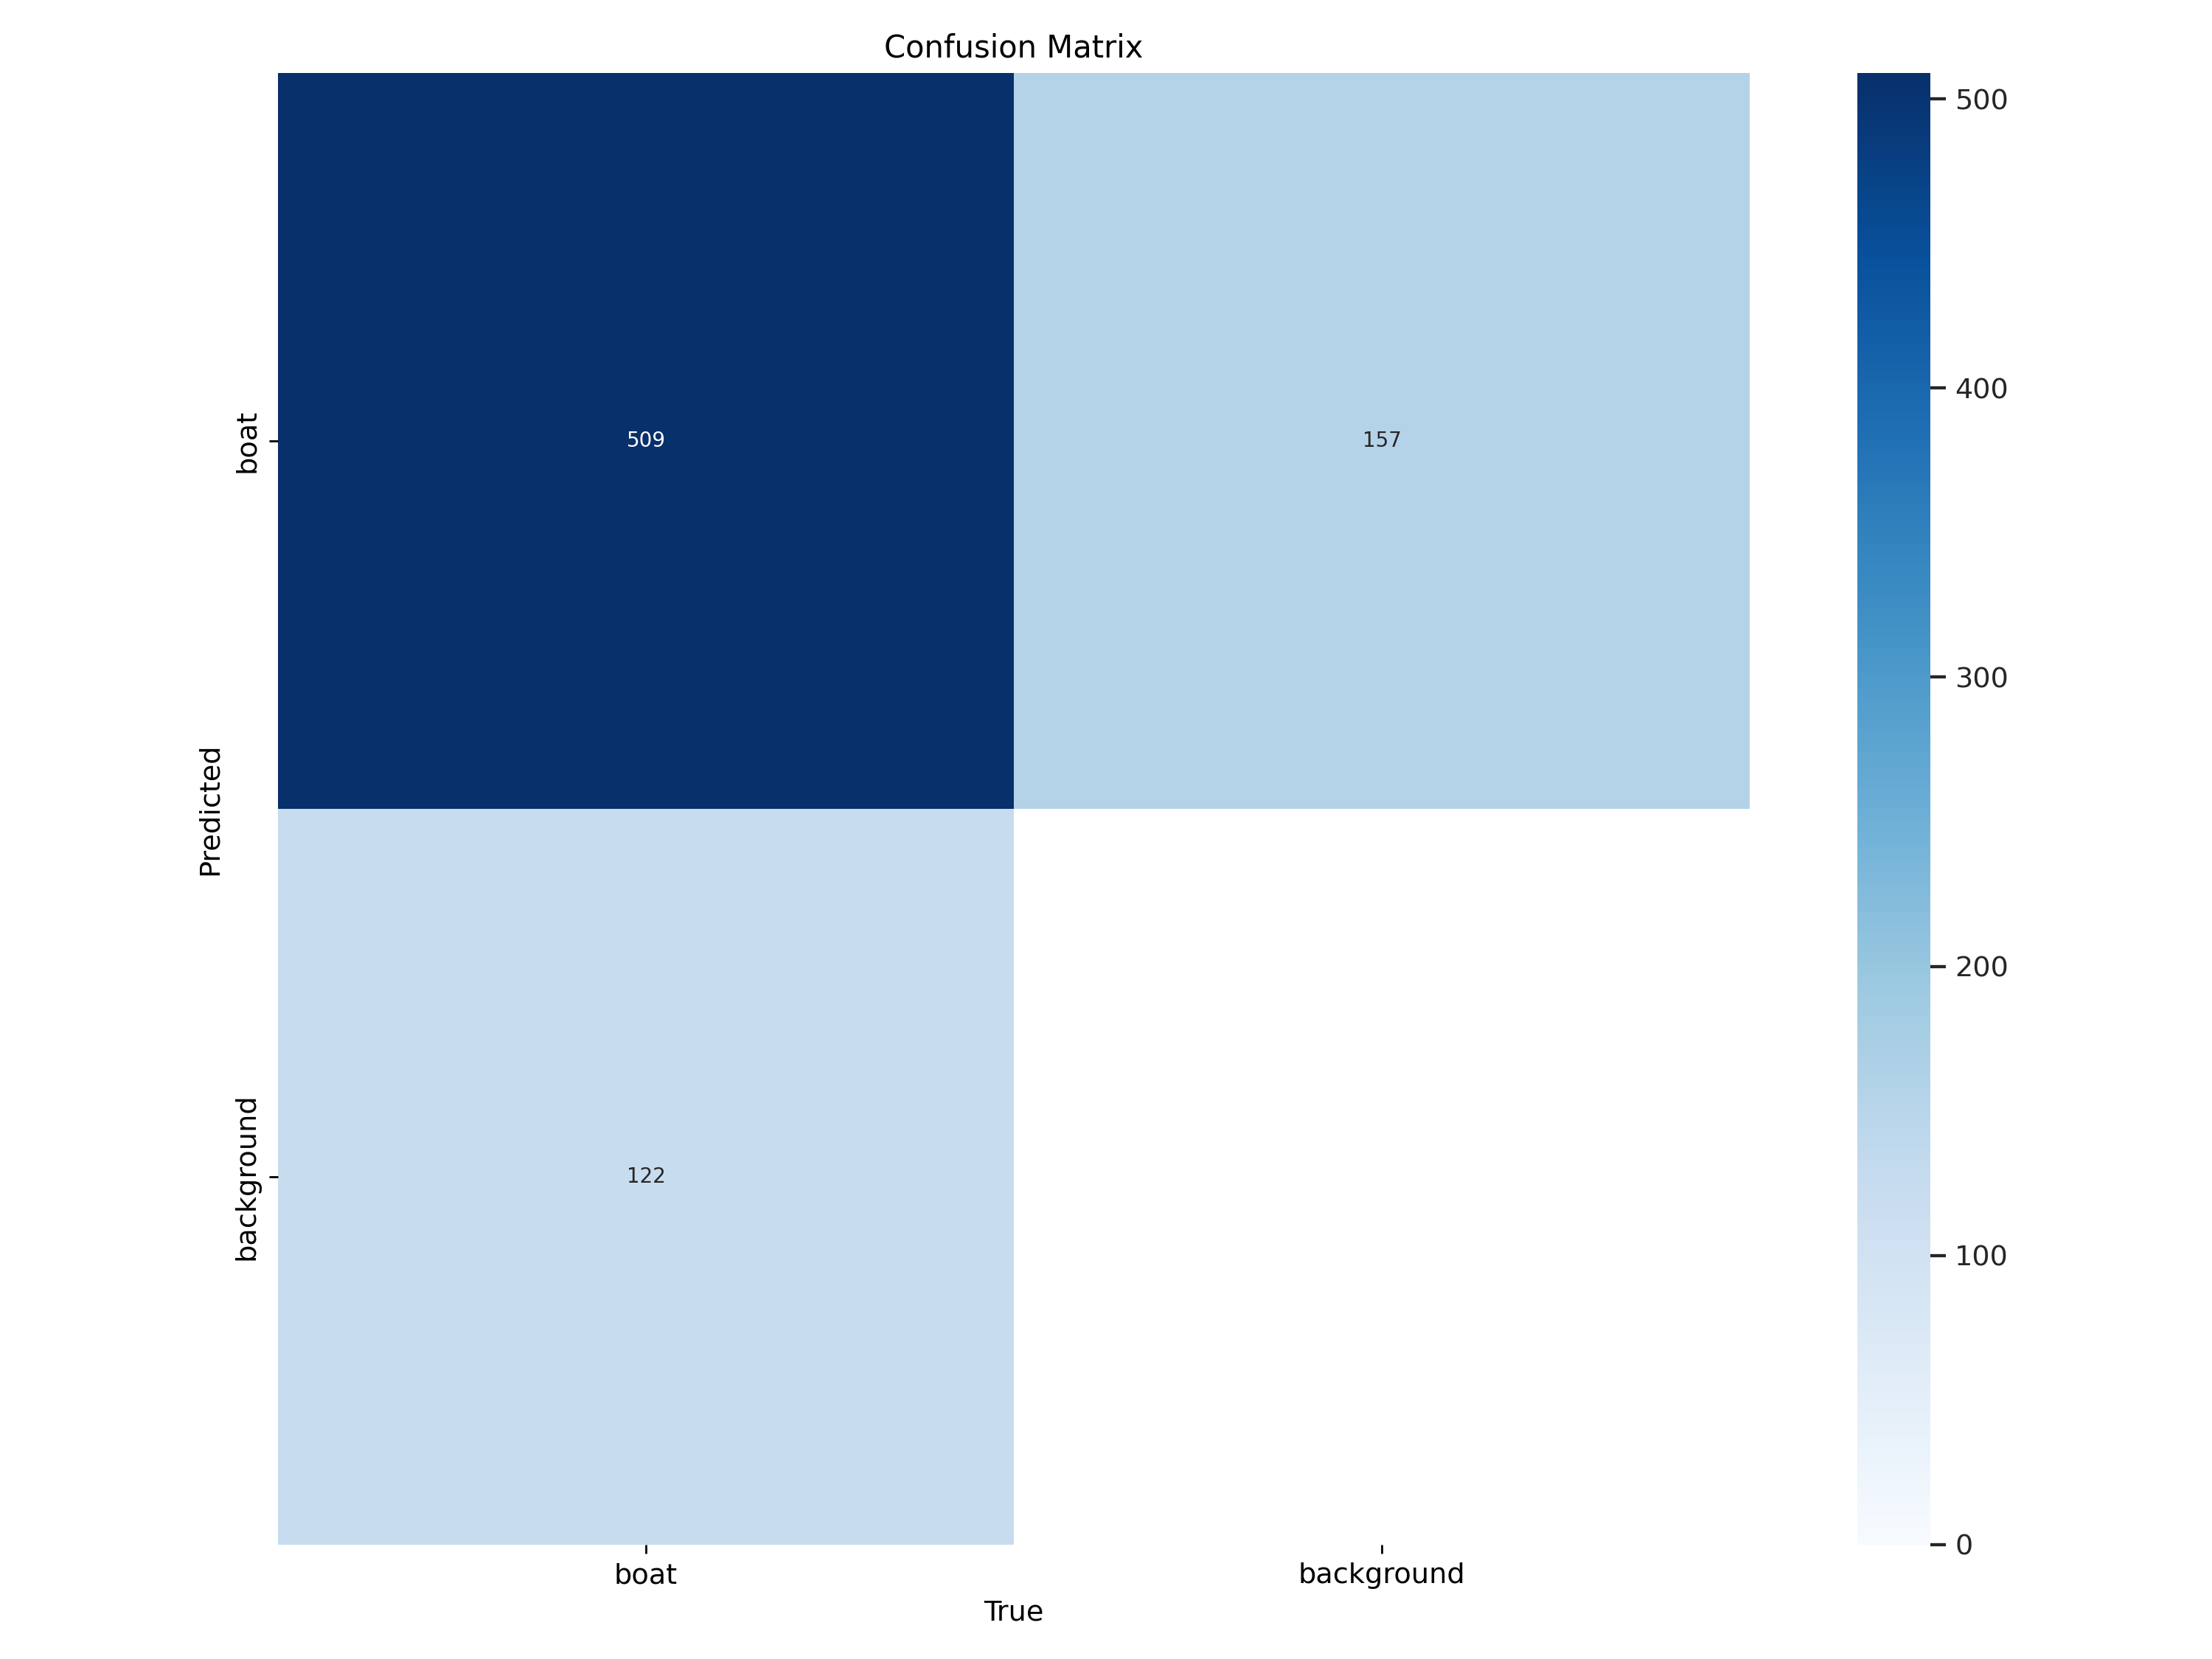

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


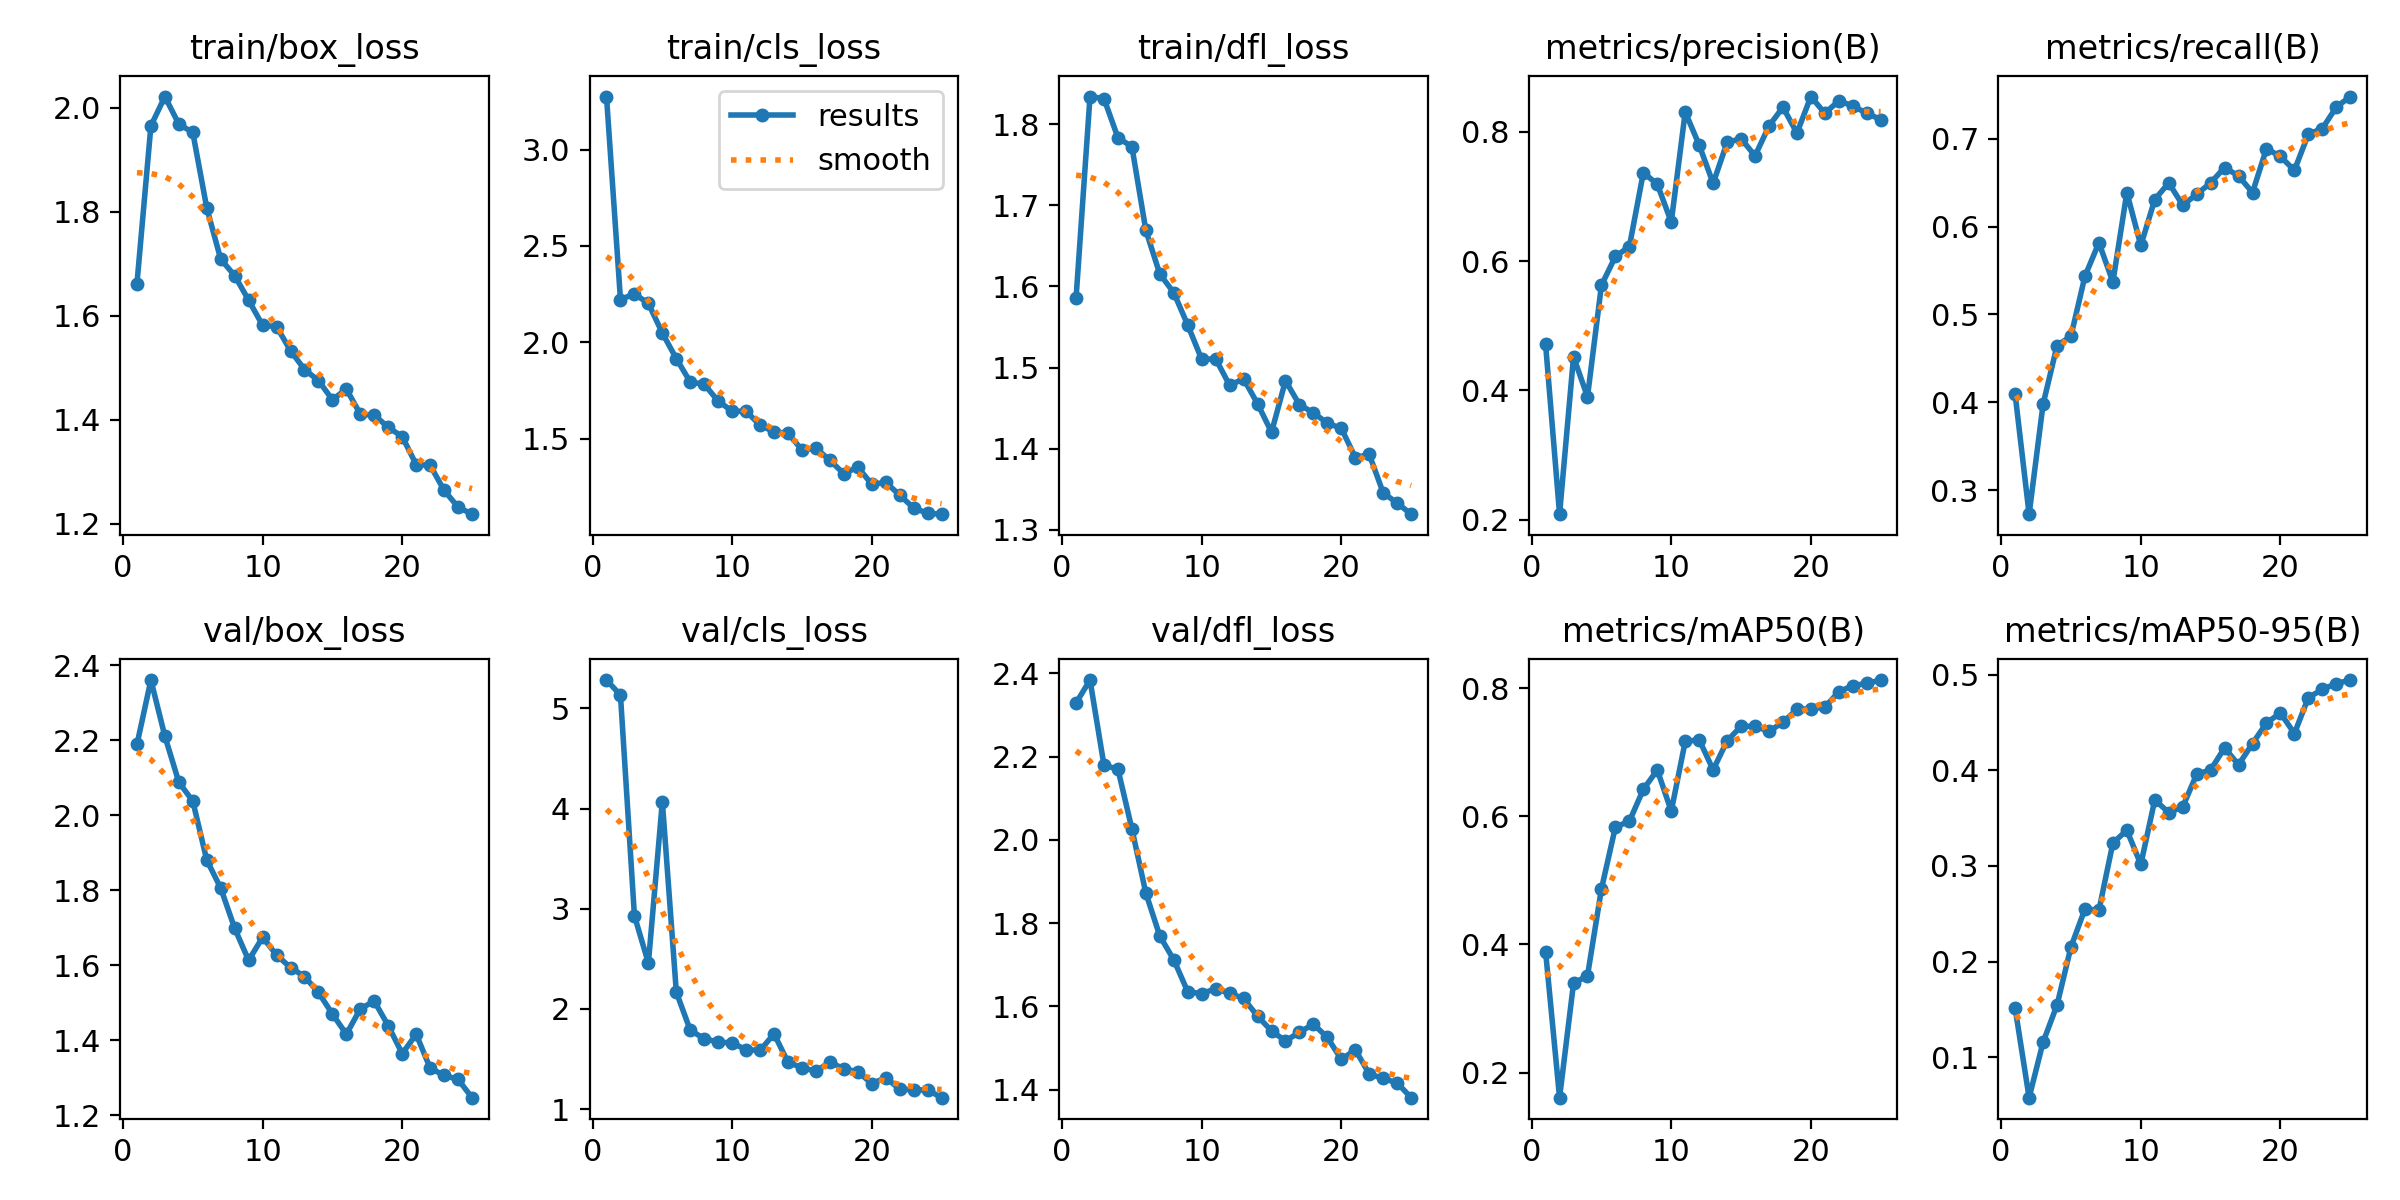

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


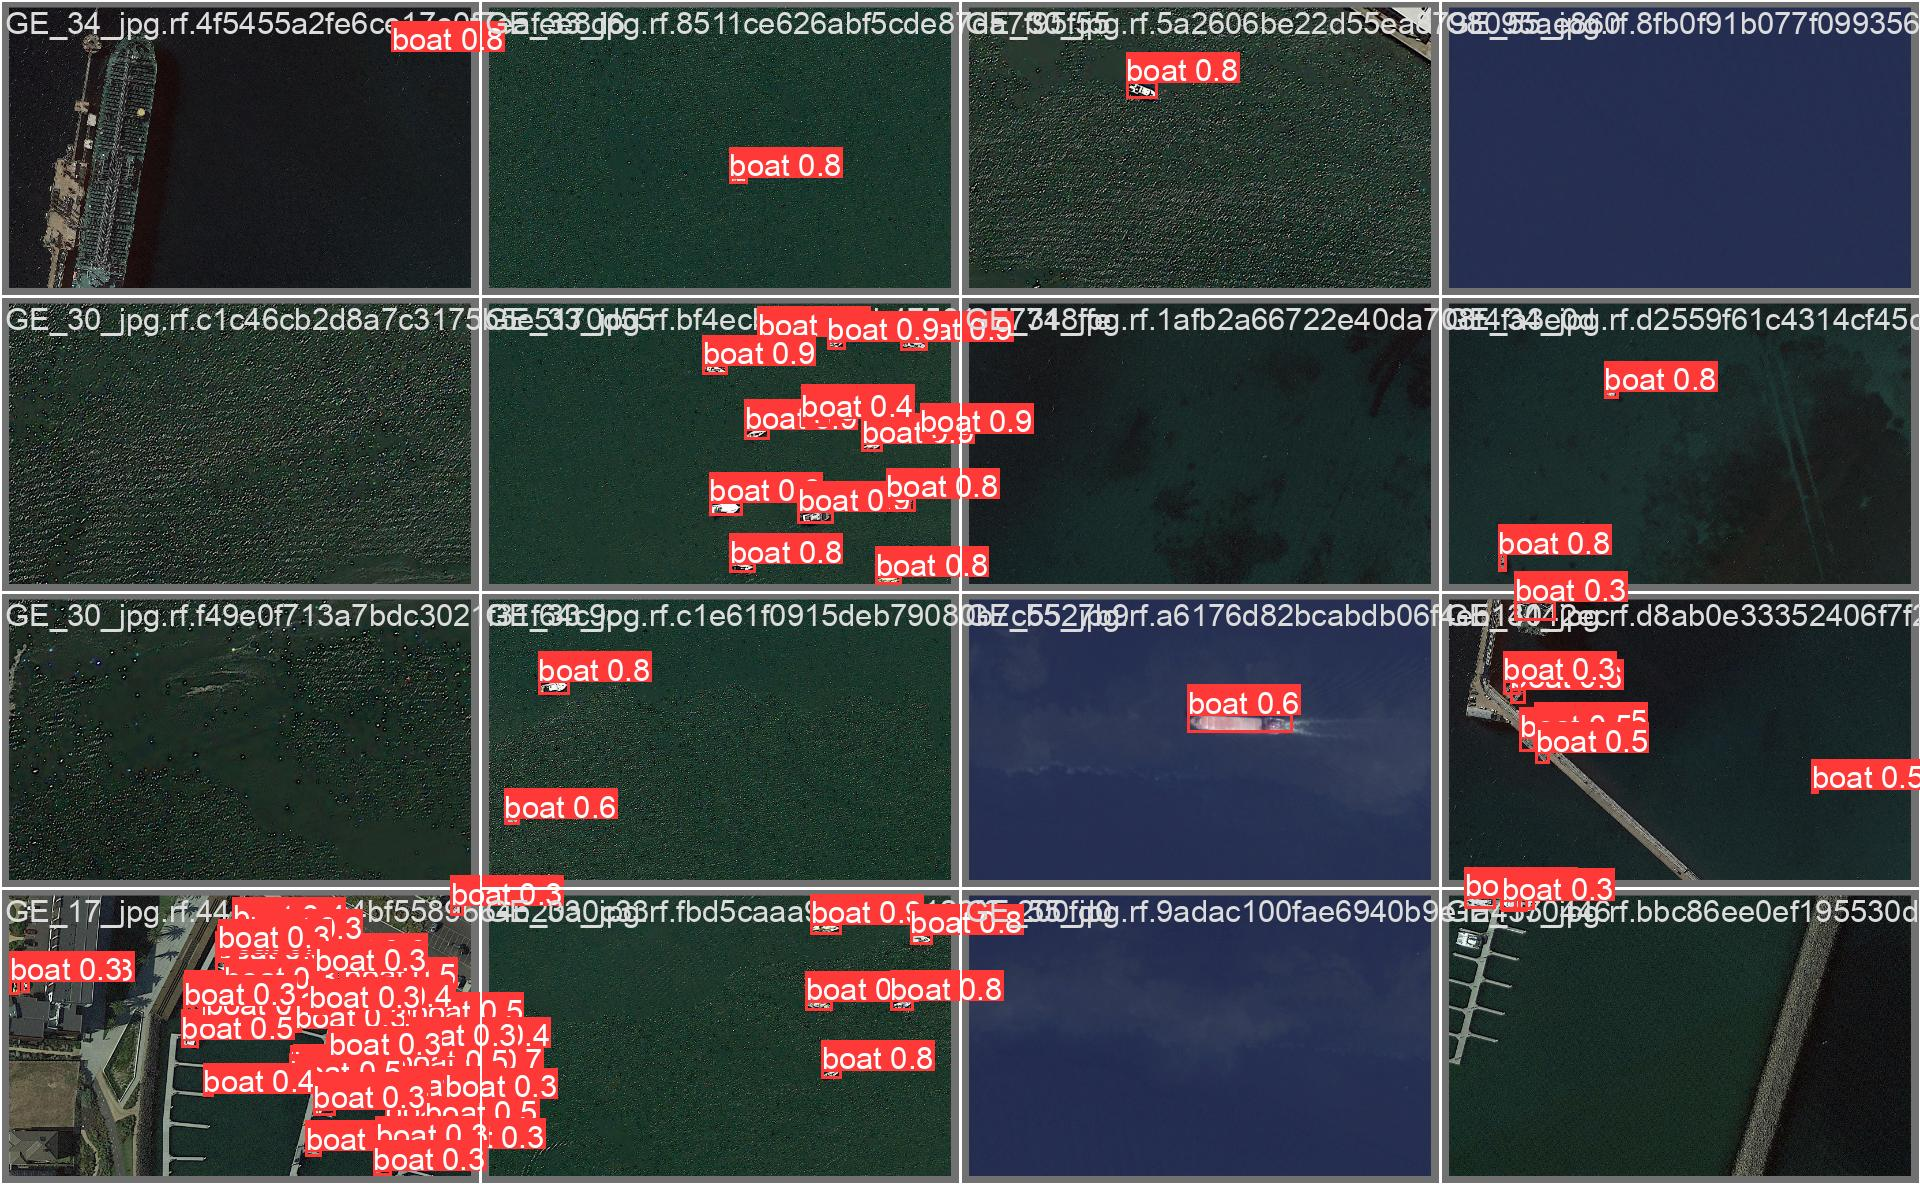

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [18]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/ships-in-google-earth-31/valid/labels.cache... 512 images, 185 backgrounds, 0 corrupt: 100% 512/512 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 32/32 [00:15<00:00,  2.02it/s]
                   all        512        631      0.829      0.735      0.814      0.494
Speed: 2.1ms preprocess, 14.9ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/160 /content/datasets/ships-in-google-earth-31/test/images/GE_114_jpg.rf.089af56b6b0ab7197d49a631b6525753.jpg: 672x800 (no detections), 188.5ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/160 /content/datasets/ships-in-google-earth-31/test/images/GE_114_jpg.rf.31765ac690ae1938ac2c68ac79d547ab.jpg: 672x800 1 boat, 21.0ms
image 3/160 /content/datasets/ships-in-google-earth-31/test/images/GE_114_jpg.rf.bae95e6fffb674fa387f2f38b9e7006f.jpg: 672x800 4 boats, 21.1ms
image 4/160 /content/datasets/ships-in-google-earth-31/test/images/GE_114_jpg.rf.fbf6010695a421e98e16eb8aaf96b252.jpg: 672x800 (no detections), 20.9ms
image 5/160 /content/datasets/ships-in-google-earth-31/test/images/GE_117_jpg.rf.4122db23803a64d002ca482d582a8885.jpg: 512x800 1 boat, 118.6ms
image 6/160 /content/datasets/ships-in-google-ea

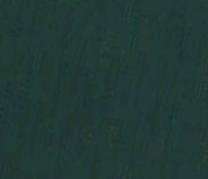

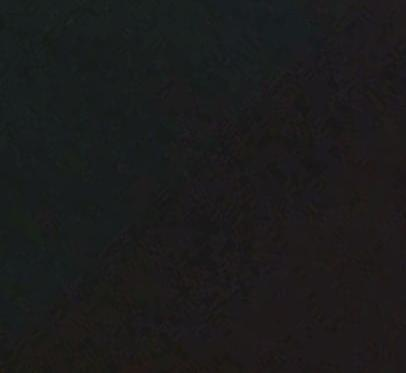

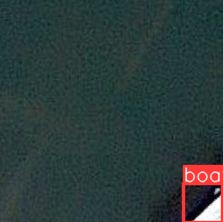

In [20]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")